In [94]:
!pip install scanpy
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.7 MB/s eta 0:00:00:00:01


In [20]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To do:
- import data
- subset features
- calculate neighbors
- UMAP
- pseudotime

In [109]:
# Load data
data = pd.read_csv('../data/mitocells.csv', index_col=0)

print('Data loaded.')

Data loaded.


In [110]:
data.columns

Index(['3d_image', 'angle', 'bbox_max_x', 'bbox_max_y', 'bbox_max_z',
       'bbox_min_x', 'bbox_min_y', 'bbox_min_z', 'bf_clip_hi', 'bf_clip_lo',
       'cell_height', 'cell_stage', 'cell_surface_area', 'cell_volume',
       'CellId', 'Cellular Component', 'center_slice',
       'Description (from Uniprot)', 'dna_clip_hi', 'dna_clip_lo', 'edge_flag',
       'fits_x', 'fits_y', 'fits_z', 'FOVId', 'gene', 'InstrumentId',
       'max_projection_x', 'max_projection_y', 'max_projection_z',
       'mean_projection_x', 'mean_projection_y', 'mean_projection_z',
       'median_projection_x', 'median_projection_y', 'median_projection_z',
       'membrane_clip_hi', 'membrane_clip_lo', 'meta_colony_area',
       'meta_colony_centroid', 'meta_colony_label', 'meta_fov_edgedist',
       'meta_fov_outside_overview', 'meta_fov_position', 'meta_fov_xcoord',
       'meta_fov_ycoord', 'meta_imaging_mode', 'meta_plate_bad_segmentation',
       'meta_plate_confluency', 'meta_well_passage_at_imaging',
     

In [118]:
# Subset to relevant features
data_sub = data.filter(items=['cell_height',
                            'cell_volume',
                            'cell_surface_area',
                            'nuclear_volume',
                            'nuclear_height',
                            'nuclear_surface_area'], axis=1)

In [121]:
# Convert data to AnnData
obj = sc.AnnData(data_sub)

obj.obs['cell_stage'] = data['cell_stage'].values

/tmp/ipykernel_20391/2364452645.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  obj = sc.AnnData(data_sub)
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [122]:
# Calculate neighborhood graph
sc.pp.neighbors(obj, n_pcs=0)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


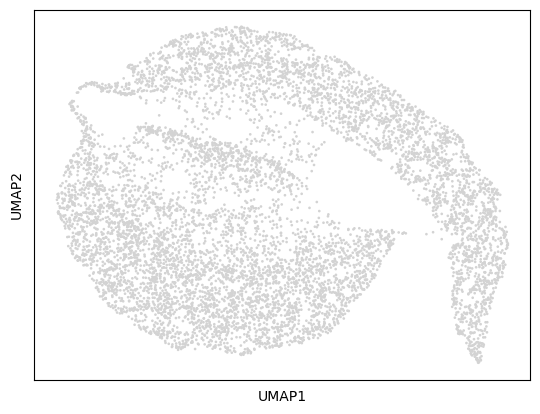

In [123]:
# Plot UMAP
sc.tl.leiden(obj)
sc.tl.umap(obj)
sc.pl.umap(obj)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


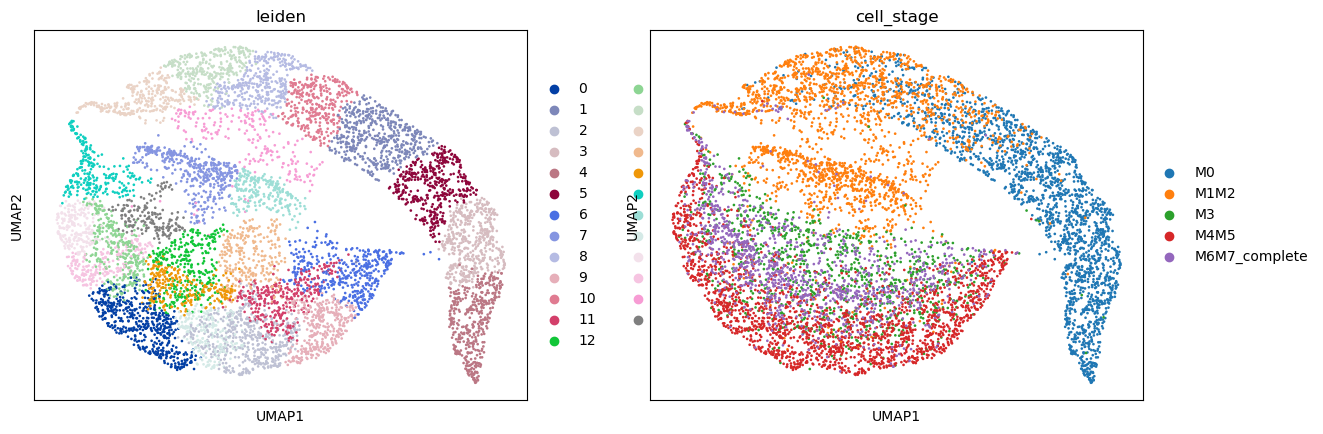

In [125]:
sc.pl.umap(obj, color=['leiden','cell_stage'])

In [126]:
# Compute diffusion map
sc.tl.diffmap(obj)

# Define root cell
obj.uns['iroot'] = np.flatnonzero(obj.obs['leiden'] == '4')[0]

In [127]:
# Calculate diffusion pseudotime

sc.tl.dpt(obj, n_branchings=0, n_dcs=10)

In [104]:
obj

AnnData object with n_obs × n_vars = 5000 × 8
    obs: 'cell_stage', 'cell_volume', 'nuclear_volume', 'leiden', 'dpt_pseudotime'
    uns: 'neighbors', 'umap', 'cell_stage_colors', 'leiden', 'leiden_colors', 'diffmap_evals', 'iroot'
    obsm: 'X_umap', 'X_diffmap'
    obsp: 'distances', 'connectivities'

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


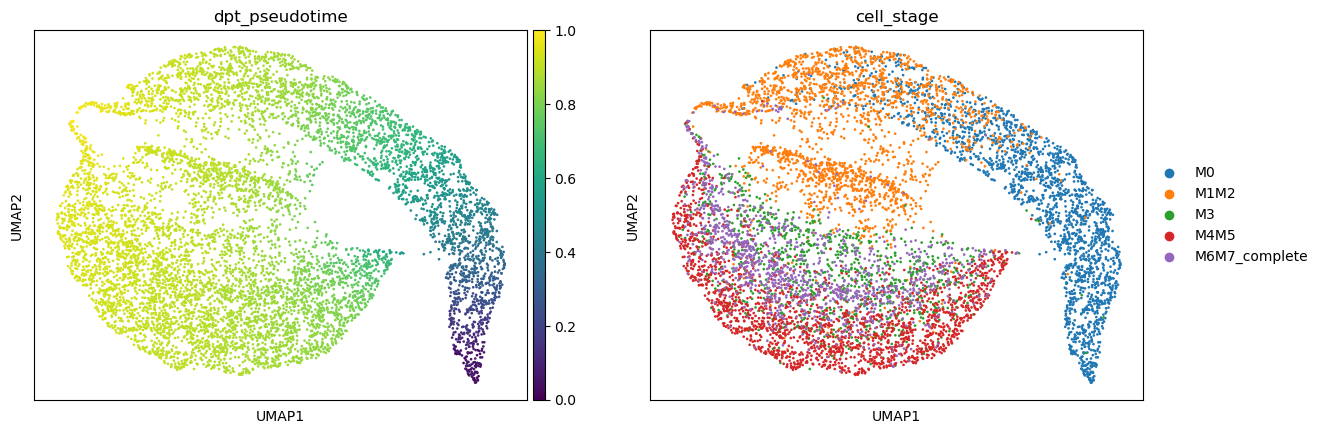

In [128]:
sc.pl.umap(obj, color=['dpt_pseudotime', 'cell_stage'])